In [1]:
# !pip install graphviz==0.9
# !pip install pydot
# !pip install seaborn==0.9.0

In [2]:
import pandas as pd

data = pd.read_csv('data/car-sales.csv').drop(columns=["Unnamed: 0"], axis=1)
data.head()

,price,sold,models_age,km_per_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
# "Bad" scenario where the classes are ordered in ascending order

bad_data = data.sort_values("sold", ascending=True)
bad_x = bad_data[["price", "models_age","km_per_year"]]
bad_y = bad_data["sold"]
bad_data.head()

,price,sold,models_age,km_per_year
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


### Creating a dummy classifier to test its accuracy

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

model = DummyClassifier()
results = cross_validate(model, bad_x, bad_y, cv = 10, return_train_score=False)
mean = results['test_score'].mean()
std = results['test_score'].std()
print("Accuracy with stratified dummy, cv = 10: [%.2f, %.2f]" % ((mean - 2 * std)*100, (mean + 2 * std) * 100))

Accuracy with stratified dummy, cv = 10: [58.00, 58.00]


### Now creating a Decision Tree CLassifier and testing its accuracy to compare to the dummy's

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, bad_x, bad_y, cv = 10, return_train_score=False)
mean = results['test_score'].mean()
std = results['test_score'].std()
print("Accuracy with cross validation, cv = 10: [%.2f, %.2f]" % ((mean - 2 * std)*100, (mean + 2 * std) * 100))

Accuracy with cross validation, cv = 10: [73.83, 77.73]


In [6]:
# Creating a "model" column to group cars by their model

np.random.seed(SEED)
data['model'] = data['models_age'] + np.random.randint(-2, 3, size=10000)
data['model'] = data['model'] + abs(data['model'].min()) + 1
data.head()

,price,sold,models_age,km_per_year,model
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [7]:
def print_results(results):
  mean = results['test_score'].mean() * 100
  std = results['test_score'].std() * 100
  print("Mean accuracy %.2f" % mean)
  print("Interval [%.2f, %.2f]" % (mean - 2 * std, mean + 2 * std))

In [8]:
# GroupKFold to analyse how the model behaves with new groups

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10) # | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, bad_x, bad_y, cv = cv, groups = data['model'], return_train_score=False)
print_results(results)

Mean accuracy 75.78
Interval [73.67, 77.90]


In [9]:
# GroupKFold in a pipeline with StandardScaler and SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
model = SVC()

pipeline = Pipeline([('Scaler',scaler), ('Estimator',model)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, bad_x, bad_y, cv = cv, groups = data.model, return_train_score=False)
print_results(results)

Mean accuracy 76.68
Interval [74.28, 79.08]


## Testing Parameters

### Creating a function that runs a Decision Tree Classifier based on the max_depth given

In [10]:
def run_decision_tree(max_depth, with_return=True):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    model = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(model, bad_x, bad_y, cv=cv, groups=data['model'], return_train_score=False)
    accuracy = results['test_score'].mean() * 100

    if with_return:
        return accuracy

### Running 30 different Decision Tree Classifiers with max_depth ranging from 1 to 30 

In [11]:
for i in range(1, 31):
    accuracy = run_decision_tree(i)    
    print("Max depth = {}, accuracy = {:.2f}%".format(i, accuracy))

Max depth = 1, accuracy = 75.78%
Max depth = 2, accuracy = 75.78%
Max depth = 3, accuracy = 78.67%
Max depth = 4, accuracy = 78.63%
Max depth = 5, accuracy = 78.56%
Max depth = 6, accuracy = 78.12%
Max depth = 7, accuracy = 77.96%
Max depth = 8, accuracy = 77.86%
Max depth = 9, accuracy = 77.38%
Max depth = 10, accuracy = 77.19%
Max depth = 11, accuracy = 76.97%
Max depth = 12, accuracy = 76.49%
Max depth = 13, accuracy = 75.81%
Max depth = 14, accuracy = 75.66%
Max depth = 15, accuracy = 75.16%
Max depth = 16, accuracy = 75.11%
Max depth = 17, accuracy = 74.74%
Max depth = 18, accuracy = 74.33%
Max depth = 19, accuracy = 74.34%
Max depth = 20, accuracy = 74.22%
Max depth = 21, accuracy = 73.80%
Max depth = 22, accuracy = 73.81%
Max depth = 23, accuracy = 73.38%
Max depth = 24, accuracy = 73.43%
Max depth = 25, accuracy = 73.14%
Max depth = 26, accuracy = 73.04%
Max depth = 27, accuracy = 72.91%
Max depth = 28, accuracy = 72.66%
Max depth = 29, accuracy = 72.73%
Max depth = 30, accurac

### Visualizing it graphically

In [12]:
graph_info = []

for i in range(1, 31):
    accuracy = run_decision_tree(i)
    aux = []
    aux.extend([i, accuracy]) # aux = [0, 75.78], for example
    graph_info.append(aux)

graph_info = np.array(graph_info)

In [13]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=graph_info[:,0], y=graph_info[:,1]))
fig.update_layout(
    title = "Median Decision Tree's Accuracy",
    xaxis_title = "Max depth",
    yaxis_title = "Accuracy",
    autosize = False,
    width = 1000,
    height = 400
)

#### Intuition would tell us that, the bigger the tree's depth, the higher it's accuracy. Why is it not the case here? This is due to **overfitting**. Our tree is doing super well in the training, since it is very well fitted. However, when it comes to the testing, the data is different. Let's see the train score as well to make this clearer.

In [14]:
def run_decision_tree(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    model = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(model, bad_x, bad_y, cv=cv, groups=data['model'], return_train_score=True) # We now want to see the train score
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100
    print("Max depth = %d, train accuracy = %.2f, test accuracy = %.2f" % (max_depth, train_score, test_score))
    graph_info = [max_depth, train_score, test_score]
    return graph_info
    

results = [run_decision_tree(i) for i in range(1, 31)]
results = pd.DataFrame(results, columns=['max_depth', 'train_score', 'test_score'])
results.head()

Max depth = 1, train accuracy = 75.79, test accuracy = 75.78
Max depth = 2, train accuracy = 75.79, test accuracy = 75.78
Max depth = 3, train accuracy = 78.75, test accuracy = 78.67
Max depth = 4, train accuracy = 78.79, test accuracy = 78.63
Max depth = 5, train accuracy = 78.94, test accuracy = 78.56
Max depth = 6, train accuracy = 79.17, test accuracy = 78.12
Max depth = 7, train accuracy = 79.50, test accuracy = 77.96
Max depth = 8, train accuracy = 79.89, test accuracy = 77.86
Max depth = 9, train accuracy = 80.46, test accuracy = 77.38
Max depth = 10, train accuracy = 81.16, test accuracy = 77.19
Max depth = 11, train accuracy = 82.03, test accuracy = 76.97
Max depth = 12, train accuracy = 82.89, test accuracy = 76.49
Max depth = 13, train accuracy = 83.95, test accuracy = 75.81
Max depth = 14, train accuracy = 85.03, test accuracy = 75.66
Max depth = 15, train accuracy = 86.14, test accuracy = 75.16
Max depth = 16, train accuracy = 87.19, test accuracy = 75.11
Max depth = 17, t

,max_depth,train_score,test_score
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


## Overfitting: "perfect" during training, bad during testing

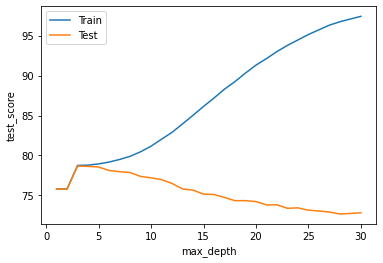

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='max_depth', y='train_score', data=results)
sns.lineplot(x='max_depth', y='test_score', data=results)
plt.legend(["Train", "Test"])

### So what are the best values for max_depth?

In [22]:
results.sort_values("test_score", ascending=False).head()

,max_depth,train_score,test_score
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185
